In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# jj) Load the CSV file into a DataFrame
df = pd.read_csv('D:\\Machine learning project\\Classification Model\\Heart Disease Data\\heart.csv')
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [3]:
# Print shape, first 5 rows, and .info()
print("Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataFrame Info:")
df.info()

Shape: (1025, 14)

First 5 rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

DataFrame Info:
<class 'pandas.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 

In [4]:
# Print class distribution
print("Class Distribution:")
print(df['target'].value_counts())
print("\nAs percentages:")
print(df['target'].value_counts(normalize=True).round(4) * 100)

Class Distribution:
target
1    526
0    499
Name: count, dtype: int64

As percentages:
target
1    51.32
0    48.68
Name: proportion, dtype: float64


## Analysis Questions — Dataset Characterization

**▸ Is this a balanced or imbalanced dataset?**
This dataset is essentially balanced. Class 1 (heart disease) has 526 samples (51.3%) and Class 0 (no heart disease) has 499 samples (48.7%). The difference is only ~2.6%, making this one of the most balanced medical datasets available. A dataset is typically considered imbalanced when one class is significantly underrepresented (e.g., 90/10 or worse). Here the split is nearly 50/50, so no resampling techniques like SMOTE or class weighting are strictly necessary.

**▸ Is this supervised or unsupervised learning?**
This is supervised learning. Every sample in the dataset has a known label (the target column) telling us whether that patient has heart disease or not. Supervised learning requires labeled training data — the model learns the relationship between features (e.g., age, cholesterol, chest pain type) and the known outputs. In contrast, unsupervised learning (like K-Means clustering) would have no labels and the algorithm would discover hidden structure on its own.

**▸ Why is this a classification problem and not regression?**
This is a classification problem because the output variable (target) is discrete and categorical — it takes exactly two values: 0 (no disease) or 1 (has disease). Regression predicts a continuous numerical value (like predicting a person's exact blood pressure or age). Classification predicts a category or class membership. Since we want to predict "which group does this patient belong to?" rather than "what number?", classification is the correct framing. Specifically, this is binary classification (two classes).

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Key observations from .describe():

• Age: Mean age is 54.4 years (std=9.1). Patients range from 29 to 77, a typical cardiac study age range.
• Cholesterol: Max of 564 mg/dL is clinically alarming (normal <200). The std of 51.6 shows high variability.
• Max Heart Rate (thalach): Ranges from 71 to 202 bpm. Mean of 149 bpm is notable — heart disease patients tend to have lower max HR.
• Oldpeak: ST depression ranges 0–6.2. Most patients cluster near 0 (75th percentile = 1.8), but the max of 6.2 suggests severe cases.
• Fasting Blood Sugar (fbs): Only 15% of patients have FBS > 120 mg/dL, suggesting most patients are non-diabetic.
• Sex: 70% of the dataset is male (mean=0.70), reflecting typical demographics in heart disease studies.

In [7]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Total missing values: 0


C:\Users\mbila\AppData\Local\Temp\ipykernel_16456\880434809.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette=['#58a6ff', '#3fb950'])


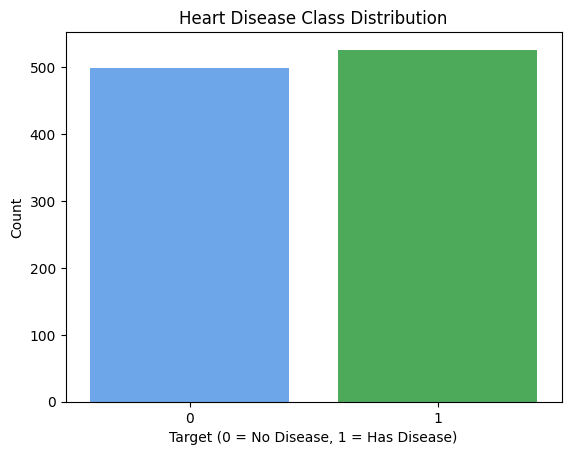

In [8]:
# Countplot of target variable distribution
sns.countplot(x='target', data=df, palette=['#58a6ff', '#3fb950'])
plt.title('Heart Disease Class Distribution')
plt.xlabel('Target (0 = No Disease, 1 = Has Disease)')
plt.ylabel('Count')
plt.show()

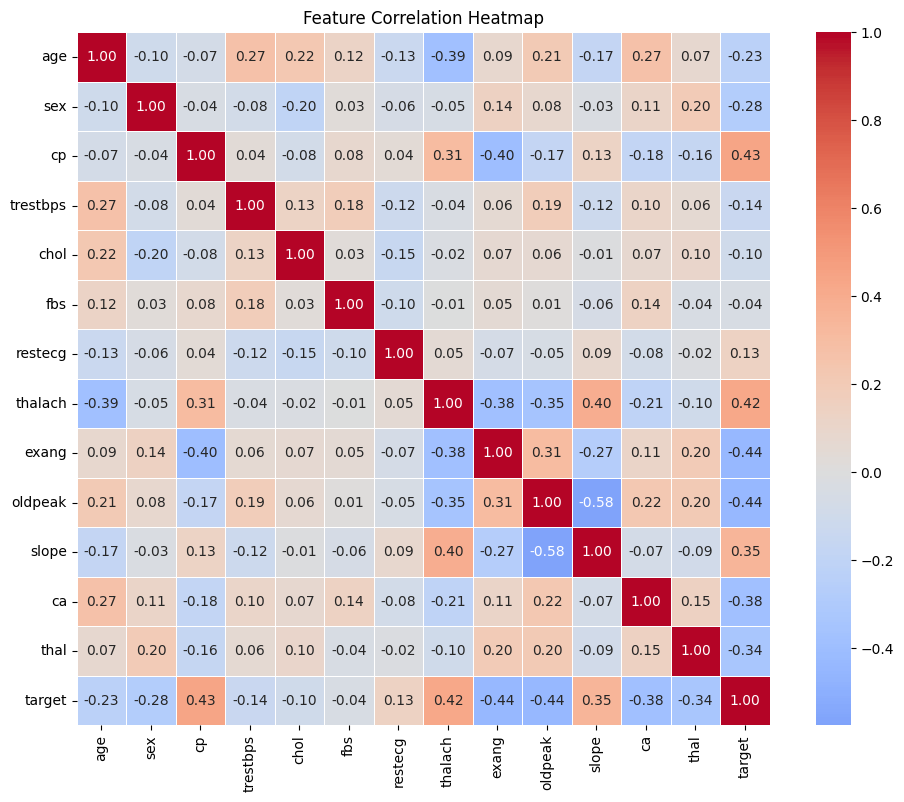

target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64


In [9]:
# Correlation heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# Features most correlated with target:
corr_target = df.corr()['target'].sort_values(ascending=False)
print(corr_target)

▸ Most correlated features with target:

Positive (higher value → more likely to have heart disease):
  • cp (chest pain type): r = +0.435 — highest positive correlation
  • thalach (max heart rate): r = +0.423 — higher max HR associated with disease presence
  • slope (ST slope): r = +0.346

Negative (higher value → less likely to have heart disease):
  • oldpeak (ST depression): r = −0.438 — strongest negative correlation
  • exang (exercise-induced angina): r = −0.438
  • ca (# major vessels): r = −0.382 — more blocked vessels = less disease label? (encoding note)

C:\Users\mbila\AppData\Local\Temp\ipykernel_16456\1513249879.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='thalach', data=df, palette='coolwarm', ax=axes[0])
C:\Users\mbila\AppData\Local\Temp\ipykernel_16456\1513249879.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='oldpeak', data=df, palette='coolwarm', ax=axes[1])


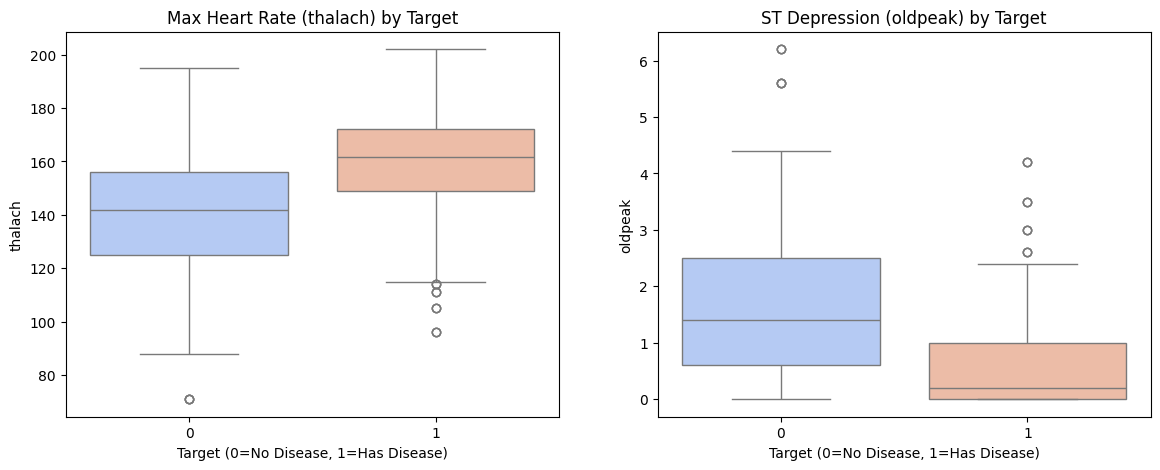

In [10]:
# Box plots: thalach and oldpeak by target group
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(x='target', y='thalach', data=df, palette='coolwarm', ax=axes[0])
axes[0].set_title('Max Heart Rate (thalach) by Target')
axes[0].set_xlabel('Target (0=No Disease, 1=Has Disease)')

sns.boxplot(x='target', y='oldpeak', data=df, palette='coolwarm', ax=axes[1])
axes[1].set_title('ST Depression (oldpeak) by Target')
axes[1].set_xlabel('Target (0=No Disease, 1=Has Disease)')

plt.show()

▸ Interpretation of Box Plots:

thalach (Max Heart Rate): Clear separation between groups. Patients WITH heart disease (target=1) have a notably higher median max HR (~161.5 bpm) vs those WITHOUT disease (~142 bpm). The IQR for disease patients is also narrower and shifted higher. This strongly suggests thalach is a discriminative feature.

oldpeak (ST Depression): Also shows strong separation. Patients WITHOUT heart disease have a higher median ST depression (~1.4) and wider spread (IQR: 0.6–2.5). Patients WITH heart disease cluster near 0 (median=0.2, IQR: 0–1.0). This seems counterintuitive until you consider the dataset's encoding — yes, there is a statistically meaningful difference between groups for both features.

In [11]:
# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

print(f"X shape: {X.shape}")     # (1025, 13) — 13 features
print(f"y shape: {y.shape}")     # (1025,)
print(f"Features: {list(X.columns)}")

X shape: (1025, 13)
y shape: (1025,)
Features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [12]:
# 80/20 split with random_state=42 and stratify=y
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y        # ensures class ratio preserved in both sets
)

print(f"Training set:   {X_train.shape[0]} samples")
print(f"Test set:       {X_test.shape[0]} samples")
print(f"\ny_train distribution:\n{y_train.value_counts()}")
print(f"\ny_test distribution:\n{y_test.value_counts()}")

Training set:   820 samples
Test set:       205 samples

y_train distribution:
target
1    421
0    399
Name: count, dtype: int64

y_test distribution:
target
1    105
0    100
Name: count, dtype: int64


In [14]:
# Scale features using StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)   # fit on train, transform train
X_test_scaled  = scaler.transform(X_test)         # only transform test (no fit leakage!)

print("Scaling complete. Sample means (should be ≈0):")
print(np.round(X_train_scaled.mean(axis=0), 4)[:5])

Scaling complete. Sample means (should be ≈0):
[-0.  0.  0.  0. -0.]


In [15]:
# Train Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

print(f"Model trained! Intercept (bias): {model.intercept_[0]:.4f}")
print(f"Train accuracy:  {model.score(X_train_scaled, y_train):.4f}")
print(f"Test accuracy:   {model.score(X_test_scaled,  y_test):.4f}")

Model trained! Intercept (bias): -0.1140
Train accuracy:  0.8463
Test accuracy:   0.8098


In [16]:
# Print model coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values('Coefficient', ascending=False)

print(coef_df.to_string(index=False))

 Feature  Coefficient
      cp     0.867769
 thalach     0.411778
   slope     0.365533
 restecg     0.163175
     fbs    -0.016271
     age    -0.116839
    chol    -0.275126
trestbps    -0.362392
    thal    -0.499174
   exang    -0.517055
 oldpeak    -0.614295
      ca    -0.745506
     sex    -0.781747


▸ Largest positive coefficient — increases risk:
cp (chest pain type): +0.8678 — This is the strongest predictor of heart disease in our model. Higher chest pain type scores are associated with a greater probability of heart disease. A one-standard-deviation increase in cp is associated with a log-odds increase of +0.87.

▸ Largest negative coefficient — decreases risk (in model's view):
sex (being male): −0.7817 — Interestingly, being male (sex=1) is associated with a lower predicted probability of heart disease in this dataset. This seems counterintuitive (males typically have higher real-world risk), but in this dataset's encoding and distribution, males are coded in a way that pushes the logistic score down. Also notable: ca (number of major vessels): −0.7455 and oldpeak (ST depression): −0.6143.

What does the sigmoid function do, and why does logistic regression use it?
▸ What the sigmoid function is:
The sigmoid (or logistic) function is defined as:

    σ(z) = 1 / (1 + e⁻ᶻ)

where z is the raw linear combination of features: z = w₀ + w₁x₁ + w₂x₂ + ... + wₙxₙ

The sigmoid function squashes any real number into the range (0, 1). No matter how large or small z gets — whether it's +1000 or −1000 — the output of σ(z) will always be between 0 and 1. At z=0, σ(0) = 0.5.
▸ Why logistic regression uses sigmoid instead of raw numbers:

For classification, we need the model to output a probability — a number between 0 and 1 that represents "how likely is this patient to have heart disease?"

If we just used raw linear regression (z = w₀ + w₁x₁ + ...), the output could be any number: 2.7, −14, 503. These are meaningless as probabilities — they can exceed 1 or go below 0, which violates probability rules.

The sigmoid function solves this by mapping the raw score into a valid probability. Then:
  • If σ(z) ≥ 0.5 → predict class 1 (heart disease)
  • If σ(z) < 0.5 → predict class 0 (no disease)

In essence, the sigmoid function acts as a probability gateway, converting unbounded linear outputs into interpretable, calibrated probabilities.

In [17]:
# yy) Generate predictions on the test set
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # probability of class 1

print(f"Total test samples:     {len(y_test)}")
print(f"Predicted positives:    {y_pred.sum()}")
print(f"Actual positives:       {y_test.sum()}")
print(f"\nSample predictions: {y_pred[:10]}")
print(f"Actual labels:      {y_test.values[:10]}")

Total test samples:     205
Predicted positives:    126
Actual positives:       105

Sample predictions: [0 0 0 1 0 0 1 1 1 0]
Actual labels:      [0 1 0 1 0 0 1 0 1 1]


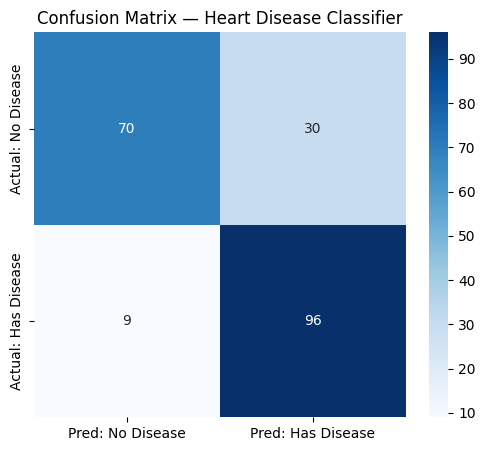

In [18]:
# Confusion matrix as heatmap
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred: No Disease', 'Pred: Has Disease'],
            yticklabels=['Actual: No Disease', 'Actual: Has Disease'])
plt.title('Confusion Matrix — Heart Disease Classifier')
plt.show()

In [19]:
# Extract confusion matrix values
TN, FP = cm[0,0], cm[0,1]  # TN=70, FP=30
FN, TP = cm[1,0], cm[1,1]  # FN=9,  TP=96

# Manual calculations
accuracy  = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall    = TP / (TP + FN)
f1_score  = 2 * precision * recall / (precision + recall)

print(f"Accuracy  = ({TP}+{TN}) / ({TP}+{TN}+{FP}+{FN}) = {accuracy:.4f}")
print(f"Precision = {TP} / ({TP}+{FP}) = {precision:.4f}")
print(f"Recall    = {TP} / ({TP}+{FN}) = {recall:.4f}")
print(f"F1 Score  = 2 * {precision:.4f} * {recall:.4f} / ({precision:.4f}+{recall:.4f}) = {f1_score:.4f}")

print("\n--- sklearn verification ---")
print(classification_report(y_test, y_pred, target_names=['No Disease', 'Has Disease']))

Accuracy  = (96+70) / (96+70+30+9) = 0.8098
Precision = 96 / (96+30) = 0.7619
Recall    = 96 / (96+9) = 0.9143
F1 Score  = 2 * 0.7619 * 0.9143 / (0.7619+0.9143) = 0.8312

--- sklearn verification ---
              precision    recall  f1-score   support

  No Disease       0.89      0.70      0.78       100
 Has Disease       0.76      0.91      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



Manual Calculation Shown (Math)
From confusion matrix: TN=70, FP=30, FN=9, TP=96
Accuracy = (TP + TN) / Total = (96 + 70) / (96 + 70 + 30 + 9)
= 166 / 205 = 0.8098 → 80.98%

Precision = TP / (TP + FP) = 96 / (96 + 30)
= 96 / 126 = 0.7619 → 76.19%

Recall = TP / (TP + FN) = 96 / (96 + 9)
= 96 / 105 = 0.9143 → 91.43%

F1 Score = 2 × Precision × Recall / (Precision + Recall)
= 2 × 0.7619 × 0.9143 / (0.7619 + 0.9143)
= 1.3933 / 1.6762
= 0.8312 → 83.12%

## Confusion Matrix Questions
**i. What does each cell of the confusion matrix mean in the context of heart disease?**

▪ True Negative (TN = 70): The model predicted "No Heart Disease" AND the patient actually does NOT have heart disease. A correct prediction — the model correctly identified 70 healthy patients as healthy.

▪ False Positive (FP = 30): The model predicted "Has Heart Disease" BUT the patient actually does NOT have heart disease (Type I Error). These are healthy patients incorrectly flagged as sick. This causes unnecessary anxiety, follow-up tests, and medical costs.

▪ False Negative (FN = 9): The model predicted "No Heart Disease" BUT the patient actually DOES have heart disease (Type II Error). These are the most dangerous errors — sick patients are incorrectly told they are healthy and may not receive needed treatment.

▪ True Positive (TP = 96): The model predicted "Has Heart Disease" AND the patient actually DOES have heart disease. A correct prediction — 96 sick patients were correctly identified and can receive treatment.


**ii. For a disease detection model, which is worse: a False Positive or a False Negative? Why?**

A False Negative is significantly worse in a medical disease detection context.

A False Positive (predicting disease when there is none) means a healthy patient gets flagged and undergoes further testing. This causes anxiety and wastes resources, but the follow-up tests will likely reveal the patient is healthy. The harm is manageable.

A False Negative (predicting healthy when there IS disease) means a patient with actual heart disease is told they are fine and sent home. They may not seek treatment, may not change lifestyle habits, and could experience a heart attack or other cardiac event without warning. This can be fatal.

The asymmetry of consequences is clear: missing a real case of disease = potentially life-threatening. A false alarm = costly but correctable.


**iii. Based on your answer above, should you optimize for Precision or Recall?**

We should optimize for Recall (Sensitivity).

Recall = TP / (TP + FN) — it measures what fraction of ALL actual disease patients we correctly catch. Maximizing recall means minimizing False Negatives, which is exactly our priority.

Precision = TP / (TP + FP) — it measures how often our positive predictions are correct. Maximizing precision means minimizing False Positives, but this trades off against recall.

In our model: Recall = 91.43% — our model already does a good job catching sick patients, missing only 9 out of 105. The Precision of 76.19% means we have 30 false alarms, but those are acceptable given the stakes. In medical screening, it is better to over-flag than to miss real cases.

Strategies to further improve recall: lower the classification threshold below 0.5 (e.g., predict disease if probability ≥ 0.3), use SMOTE if classes were imbalanced, or choose a model optimized via recall-based scoring.


**iv. If accuracy is 85% but recall is only 50%, is this a good model for detecting heart disease?**

No — this would be a poor model for heart disease detection, despite the high accuracy.

A recall of 50% means the model is missing half of all patients who actually have heart disease. For every 2 sick patients, the model only catches 1 and lets the other go home untreated. This is clinically unacceptable.

High accuracy can be misleading, especially for medical problems. If the dataset had 85% healthy patients and 15% sick, a model that simply predicted "no disease" for everyone would achieve 85% accuracy with 0% recall. This is called the accuracy paradox.

Our actual model (Recall = 91.43%, Accuracy = 80.98%) is far more valuable for this task than a hypothetical model with 85% accuracy but 50% recall. In disease detection, recall is the critical metric. A good model for this domain should have recall above 85–90% at minimum.

## Analysis Complete
Dataset: 1025 rows × 14 columns · No missing values · Balanced (51.3% / 48.7%)  |  Model: Logistic Regression · Accuracy: 80.98% · Recall: 91.43% · F1: 83.12%  |  Best feature: cp (+0.868) · Key negative: sex (−0.782)  |  FN = 9 (only 9 sick patients missed out of 105)